# Dickey Fuller Test

## How to load data from FRED
1. Sign up for FRED and use the API
2. After downloading Excel, load it
https://raw.githubusercontent.com/sm-joo/sm-joo/master/DEXKOUS.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller

## Daily data
Time series data preprocessing
plot: daily, weekly (resample)
Monthly volatility comparison (rolling)

- Time series data preprocessing
- plot : daily, weekly (resample)
- Monthly volatility comparison (rolling)

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/sm-joo/sm-joo/master/DEXKOUS.csv', parse_dates=['DATE'], index_col='DATE')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1306 entries, 2015-03-13 to 2020-03-13
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   DEXKOUS  1306 non-null   object
dtypes: object(1)
memory usage: 20.4+ KB


In [3]:
df.head()

,DEXKOUS
DATE,
2015-03-13,1135.7
2015-03-16,1129.62
2015-03-17,1127.69
2015-03-18,1127.09
2015-03-19,1121.21


In [6]:
df.columns=['KOUS']

In [8]:
df.head()

,KOUS
DATE,
2015-03-13,1135.7
2015-03-16,1129.62
2015-03-17,1127.69
2015-03-18,1127.09
2015-03-19,1121.21


In [9]:
df['KOUS'].replace('.', '', inplace=True)

In [10]:
df['KOUS']=pd.to_numeric(df['KOUS'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1306 entries, 2015-03-13 to 2020-03-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   KOUS    1251 non-null   float64
dtypes: float64(1)
memory usage: 20.4 KB


In [12]:
df.isnull().sum()

KOUS    55
dtype: int64

In [13]:
# forward fill 
df['KOUS'].fillna(method='ffill', inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1306 entries, 2015-03-13 to 2020-03-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   KOUS    1306 non-null   float64
dtypes: float64(1)
memory usage: 20.4 KB


<AxesSubplot:xlabel='DATE'>

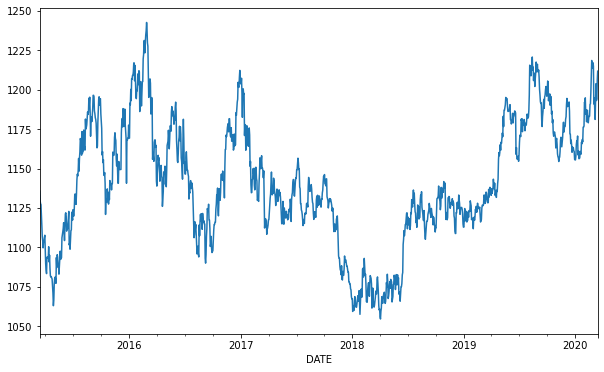

In [15]:
df['KOUS'].plot(figsize=(10,6))

In [27]:
df.resample('M').last().head()

,KOUS
DATE,
2015-03-31,1107.71
2015-04-30,1076.74
2015-05-31,1111.99
2015-06-30,1117.34
2015-07-31,1159.70


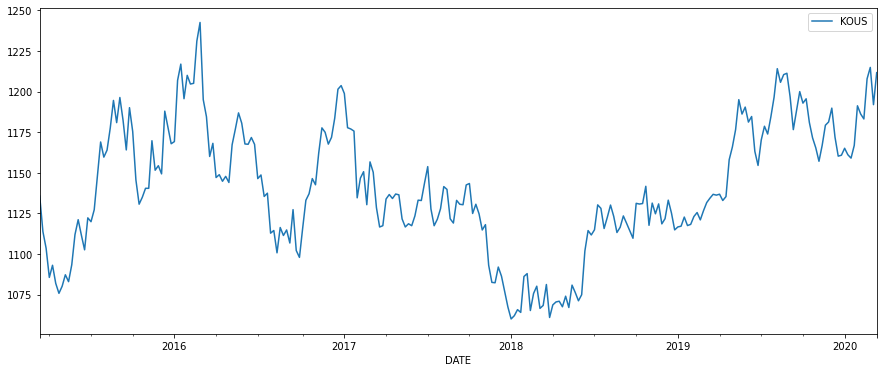

In [20]:
# resample : Daily data -> Convert to weekly data or monthly data
df.resample('M').last()

# weekly Friday
df.resample('W-Fri').last().plot(figsize=(15,6))

In [26]:
# rolling : Used to calculate the moving average and moving sum for the previous xx days
df.rolling(10).mean().head()

,KOUS
DATE,
2015-03-13,NaN
2015-03-16,NaN
2015-03-17,NaN
2015-03-18,NaN
2015-03-19,NaN


<AxesSubplot:xlabel='DATE'>

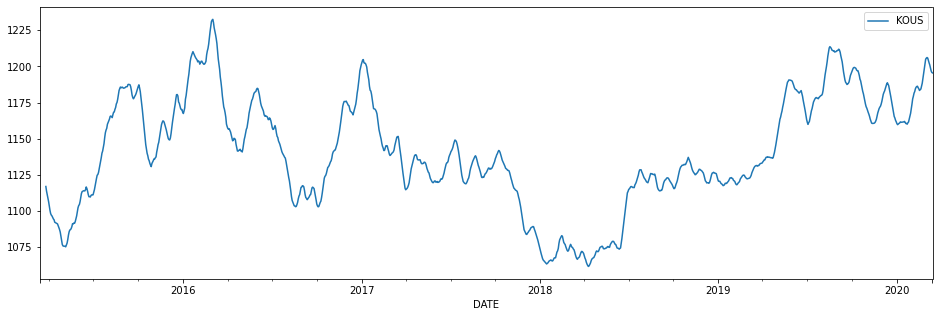

In [24]:
df.rolling(10).mean().plot(figsize=(16,5))

In [25]:
df.rolling(30).std().head()

,KOUS
DATE,
2015-03-13,NaN
2015-03-16,NaN
2015-03-17,NaN
2015-03-18,NaN
2015-03-19,NaN


In [30]:
df.rolling(30).std().resample('M').mean().head()

,KOUS
DATE,
2015-03-31,NaN
2015-04-30,14.415857
2015-05-31,10.133676
2015-06-30,12.350942
2015-07-31,13.487478


<AxesSubplot:xlabel='DATE'>

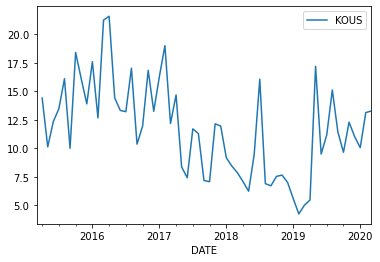

In [31]:
# See overall volatility
df.rolling(30).std().resample('M').mean().plot()

---------------------

# Stability Test (ADF Test)
- null hypothesis = not stable
- If the p-value is less than 0.05, reject the null hypothesis. That is, a stable time series
- If the P-value is greater than 0.05, the null hypothesis is accepted. That is, an unstable time series
- Change to stable data: rate of change / log difference

In [32]:
adfuller(df['KOUS'])

(-2.6235188039221153,
 0.0882331757572502,
 0,
 1305,
 {'1%': -3.4353708501743654,
  '5%': -2.8637572934525286,
  '10%': -2.56795049999266},
 8358.34690710183)

### Convert to Stable Time Series 
* y(t+1)/y(t) -1
* log(y(t+1))-log(y(t))

In [34]:
adfuller(df.KOUS.pct_change().dropna())
df.KOUS.pct_change().dropna()

DATE
2015-03-16   -0.005354
2015-03-17   -0.001709
2015-03-18   -0.000532
2015-03-19   -0.005217
2015-03-20   -0.006546
                ...   
2020-03-09    0.009857
2020-03-10   -0.008847
2020-03-11    0.000888
2020-03-12    0.010074
2020-03-13    0.004568
Name: KOUS, Length: 1305, dtype: float64

In [35]:
(df.KOUS/df.KOUS.shift(1) -1).dropna()

DATE
2015-03-16   -0.005354
2015-03-17   -0.001709
2015-03-18   -0.000532
2015-03-19   -0.005217
2015-03-20   -0.006546
                ...   
2020-03-09    0.009857
2020-03-10   -0.008847
2020-03-11    0.000888
2020-03-12    0.010074
2020-03-13    0.004568
Name: KOUS, Length: 1305, dtype: float64

In [36]:
(np.log(df.KOUS)-np.log(df.KOUS.shift(1))).dropna()

DATE
2015-03-16   -0.005368
2015-03-17   -0.001710
2015-03-18   -0.000532
2015-03-19   -0.005231
2015-03-20   -0.006568
                ...   
2020-03-09    0.009809
2020-03-10   -0.008887
2020-03-11    0.000888
2020-03-12    0.010024
2020-03-13    0.004558
Name: KOUS, Length: 1305, dtype: float64